## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## Importing Dataset

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape


(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data=df.groupby('Species')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x21822eb2ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x21822e44850>,
 'boxes': [<matplotlib.lines.Line2D at 0x21822ea5810>],
 'medians': [<matplotlib.lines.Line2D at 0x21822ebe110>],
 'fliers': [<matplotlib.lines.Line2D at 0x21822eb3b10>],
 'means': []}

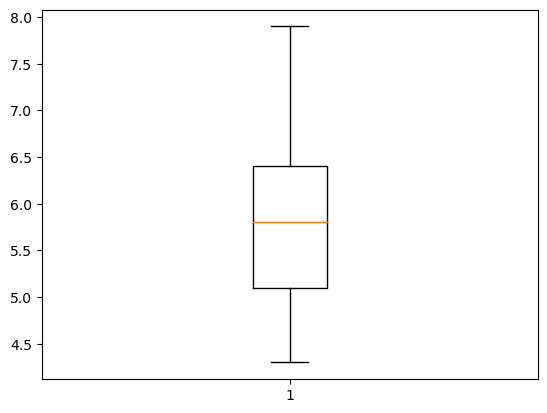

In [10]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21823778290>,
 'caps': [<matplotlib.lines.Line2D at 0x21823779950>,
 'boxes': [<matplotlib.lines.Line2D at 0x2182376b7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2182377af90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21823779550>],
 'means': []}

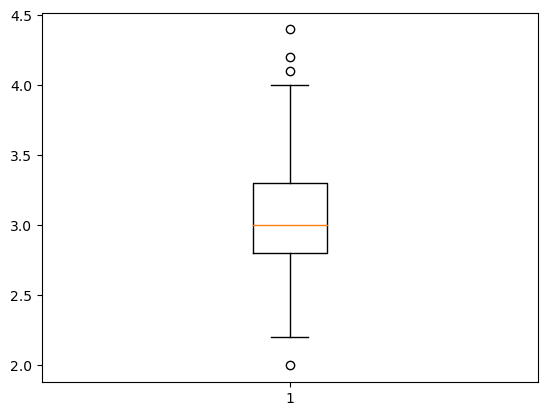

In [11]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x218237dcb90>,
 'caps': [<matplotlib.lines.Line2D at 0x218237de110>,
 'boxes': [<matplotlib.lines.Line2D at 0x218237d7f50>],
 'medians': [<matplotlib.lines.Line2D at 0x218237df790>],
 'fliers': [<matplotlib.lines.Line2D at 0x21822eb2390>],
 'means': []}

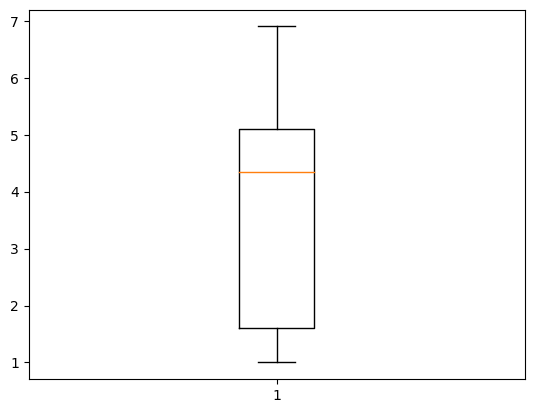

In [12]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21823842090>,
 'caps': [<matplotlib.lines.Line2D at 0x21823843910>,
 'boxes': [<matplotlib.lines.Line2D at 0x21823841510>],
 'medians': [<matplotlib.lines.Line2D at 0x2182384ced0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21822eefd90>],
 'means': []}

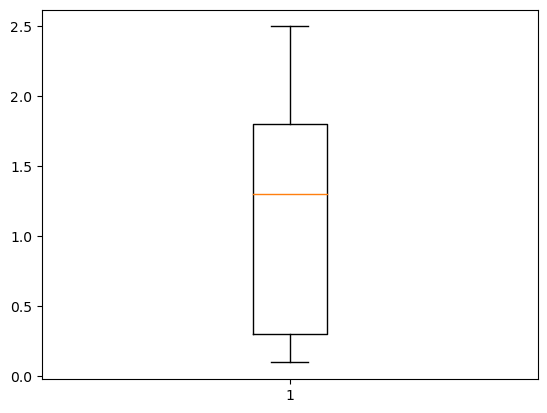

In [13]:
plt.boxplot(df['PetalWidthCm'])


## Data Preparation

In [17]:
df.drop('Id',axis=1,inplace=True)
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
df.Species=[sp[i] for i in df.Species]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [18]:
X=df.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y=df.iloc[:,4]
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

## Traiming Model

In [22]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [23]:
model.score(X,y) #coef of prediction

0.9304223675331595

In [24]:
model.coef_


array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

## Making Predictions

In [26]:
y_pred=model.predict(X_test)

## Model Evolution

In [27]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
